In [59]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [60]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [61]:
X_train = X_train.reshape(-1,28*28) / 255.0
X_test = X_test.reshape(-1,28*28) / 255.0

In [62]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

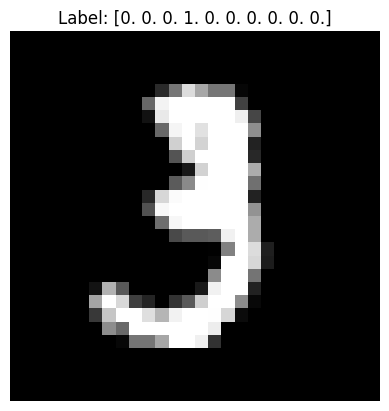

In [76]:
sample_index = 10  # You can pick any index
X_sample = X_train[sample_index].reshape(1, -1)  # Reshape to match batch input
y_sample_true = y_train[sample_index]            # Actual label (integer)
# Preview a sample image
plt.imshow(X_sample.reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_sample_true}")
plt.axis('off')
plt.show()

In [68]:
class ANN:
    def __init__(self,input_size = 784,hidden_size = 64,output_size = 10,learning_rate = 0.1):
        self.lr = learning_rate
        self.W1 = np.random.randn(input_size,hidden_size) * 0.01
        self.W2 = np.random.randn(hidden_size,output_size) * 0.01
        self.b1 = np.zeros((1,hidden_size))
        self.b2 = np.zeros((1,output_size))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def softmax(self, z):
        e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return  e_z / np.sum(e_z, axis=1, keepdims=True)

    def forward(self,X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.softmax(self.Z2)
        return self.A2

    def backward(self,X,y,output):
        m = X.shape[0]

        dZ2 = output - y
        dW2 = np.dot(self.A1.T,dZ2) / m
        db2 = np.sum(dZ2,axis = 0,keepdims = True)/m

        dZ1 = np.dot(dZ2,self.W2.T) * self.A1 * (1-self.A1)
        dW1 = np.dot(X.T,dZ1) / m
        db1 = np.sum(dZ1,axis = 0,keepdims = True)/m

        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def train(self,X,y,epochs = 10,batch_size = 64):
        for epoch in range(epochs):
            for i in range(0,X.shape[0],batch_size):
                X_batch = X[i:i+batch_size]
                Y_batch = y[i:i+batch_size]

                output = self.forward(X_batch)
                self.backward(X_batch,Y_batch,output)

            pred = self.predict(X)
            acc = np.mean(np.argmax(pred,axis = 1) == np.argmax(y,axis = 1))
            print(f"Epoch {epoch + 1} : Accuracy : {acc:.4f} ")

    def predict(self,X):
        return self.forward(X)

model = ANN()
model.train(X_train,y_train,epochs = 20)

y_pred = model.predict(X_test)
accuracy = np.mean(np.argmax(y_pred,axis = 1) == np.argmax(y_test,axis = 1))
print(f"Test accuracy : {accuracy:.4f}")



Epoch 1 : Accuracy : 0.8523 
Epoch 2 : Accuracy : 0.8957 
Epoch 3 : Accuracy : 0.9091 
Epoch 4 : Accuracy : 0.9173 
Epoch 5 : Accuracy : 0.9237 
Epoch 6 : Accuracy : 0.9299 
Epoch 7 : Accuracy : 0.9349 
Epoch 8 : Accuracy : 0.9388 
Epoch 9 : Accuracy : 0.9425 
Epoch 10 : Accuracy : 0.9456 
Epoch 11 : Accuracy : 0.9483 
Epoch 12 : Accuracy : 0.9508 
Epoch 13 : Accuracy : 0.9532 
Epoch 14 : Accuracy : 0.9550 
Epoch 15 : Accuracy : 0.9567 
Epoch 16 : Accuracy : 0.9585 
Epoch 17 : Accuracy : 0.9600 
Epoch 18 : Accuracy : 0.9614 
Epoch 19 : Accuracy : 0.9628 
Epoch 20 : Accuracy : 0.9643 
Test accuracy : 0.9594


In [71]:
class ANN:
    def __init__(self,input_size = 784,hidden_size = 64,output_size = 10,learning_rate = 0.1):
        self.lr = learning_rate
        self.W1 = np.random.randn(input_size,hidden_size) * 0.01
        self.W2 = np.random.randn(hidden_size,output_size) * 0.01
        self.b1 = np.zeros((1,hidden_size))
        self.b2 = np.zeros((1,output_size))

    def softmax(self, z):
        e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return  e_z / np.sum(e_z, axis=1, keepdims=True)

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)


    def forward(self,X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.softmax(self.Z2)
        return self.A2

    def backward(self,X,y,output):
        m = X.shape[0]

        dZ2 = output - y
        dW2 = np.dot(self.A1.T,dZ2) / m
        db2 = np.sum(dZ2,axis = 0,keepdims = True)/m

        dZ1 = np.dot(dZ2,self.W2.T) * self.relu_derivative(self.Z1)
        dW1 = np.dot(X.T,dZ1) / m
        db1 = np.sum(dZ1,axis = 0,keepdims = True)/m

        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def train(self,X,y,epochs = 10,batch_size = 64):
        for epoch in range(epochs):
            for i in range(0,X.shape[0],batch_size):
                X_batch = X[i:i+batch_size]
                Y_batch = y[i:i+batch_size]

                output = self.forward(X_batch)
                self.backward(X_batch,Y_batch,output)

            pred = self.predict(X)
            acc = np.mean(np.argmax(pred,axis = 1) == np.argmax(y,axis = 1))
            print(f"Epoch {epoch + 1} : Accuracy : {acc:.4f} ")

    def predict(self,X):
        return self.forward(X)

model = ANN()
model.train(X_train,y_train,epochs = 20)

y_pred = model.predict(X_test)
accuracy = np.mean(np.argmax(y_pred,axis = 1) == np.argmax(y_test,axis = 1))
print(f"Test accuracy : {accuracy:.4f}")



Epoch 1 : Accuracy : 0.9107 
Epoch 2 : Accuracy : 0.9353 
Epoch 3 : Accuracy : 0.9479 
Epoch 4 : Accuracy : 0.9571 
Epoch 5 : Accuracy : 0.9633 
Epoch 6 : Accuracy : 0.9673 
Epoch 7 : Accuracy : 0.9706 
Epoch 8 : Accuracy : 0.9731 
Epoch 9 : Accuracy : 0.9756 
Epoch 10 : Accuracy : 0.9778 
Epoch 11 : Accuracy : 0.9794 
Epoch 12 : Accuracy : 0.9808 
Epoch 13 : Accuracy : 0.9820 
Epoch 14 : Accuracy : 0.9832 
Epoch 15 : Accuracy : 0.9843 
Epoch 16 : Accuracy : 0.9852 
Epoch 17 : Accuracy : 0.9861 
Epoch 18 : Accuracy : 0.9868 
Epoch 19 : Accuracy : 0.9873 
Epoch 20 : Accuracy : 0.9880 
Test accuracy : 0.9727


In [77]:
y_sample_pred=model.predict(X_sample)[0]
print(y_sample_pred)
print(np.argmax(y_sample_pred))

[1.63224686e-10 1.08775007e-06 2.32976120e-09 9.99973704e-01
 1.51180899e-12 2.01328748e-06 2.50933700e-15 1.27763925e-12
 6.36186231e-07 2.25565089e-05]
3


In [78]:
print(np.dot(y_sample_true,y_sample_pred))

0.9999737037715543
